In [ ]:
pip install tensorflow matplotlib numpy


You are required to build and train a basic autoencoder using the MNIST dataset
(handwritten digits).
1. Model Design
○ Implement an encoder that compresses a 28×28 grayscale image into a smaller
latent representation.
○ Implement a decoder that reconstructs the original image from this latent space.
2. Model Training
○ Train the autoencoder on the MNIST training dataset.
○ Evaluate its performance using the test dataset.
3. Model Evaluation and Visualization
○ Display the model summary.
○ Plot the training and validation loss curves.
○ Show a side-by-side comparison of original vs reconstructed images from the
test set.

Deliverables
● Model summary of your autoencoder.
● Training vs validation loss curves.
● Side-by-side comparison plots (original vs reconstructed images).
● Short explanation of results (1–2 paragraphs).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape


In [ ]:
#Load MNIST dataset
# Load dataset
(x_train, _), (x_test, _) = mnist.load_data()
# Normalize pixel values
x_train = x_train.astype("float32") / 255.# floating point mostly deep learning tensor flow mostly works.but it will consume GPU
x_test  = x_test.astype("float32") / 255.
# Flatten images
print(len(x_train))
print(len(x_test))
x_train = x_train.reshape((len(x_train), 784))
x_test  = x_test.reshape((len(x_test), 784))

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


60000
10000
Train shape: (60000, 784)
Test shape: (10000, 784)


In [ ]:
#Model Design (Encoder + Decoder)
#compressing 784 to latent space to reconstruct back.
input_img = Input(shape=(784,))
#lets reduce by 28,then 64 ,then to 32
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
latent = Dense(32, activation='relu')(encoded)
#decoded
decoded = Dense(64, activation='relu')(latent)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
autoencoder = Model(input_img, decoded)




In [ ]:
#Compile the Model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
#Display Model Summary
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Train the Model
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.3377 - val_loss: 0.1710
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1601 - val_loss: 0.1375
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1349 - val_loss: 0.1230
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1227 - val_loss: 0.1161
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1163 - val_loss: 0.1114
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1122 - val_loss: 0.1080
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.1087 - val_loss: 0.1053
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1058 - val_loss: 0.1032
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1041 - val_loss: 0.1016
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1021 - val_loss: 0.1002
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1010 - val_loss: 0.0990
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

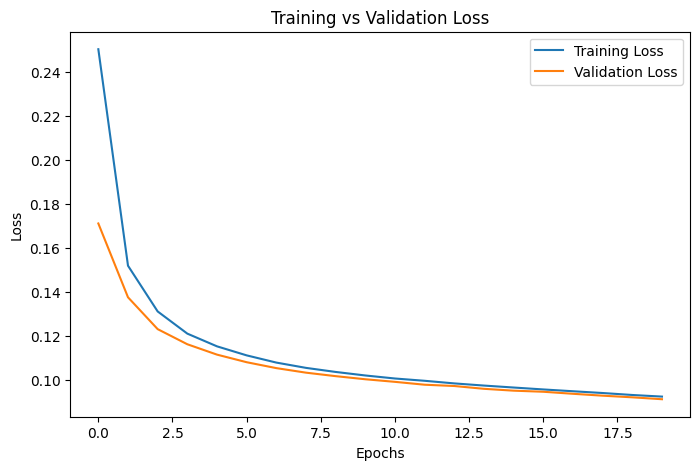

In [ ]:
#Plot Training vs Validation Loss
plt.figure(figsize=(8,5))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
#Reconstruct Images from Test Set
decoded_imgs = autoencoder.predict(x_test)
#reshaping back to 28 by 28
decoded_imgs = decoded_imgs.reshape(-1, 28, 28)
x_test_img   = x_test.reshape(-1, 28, 28)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


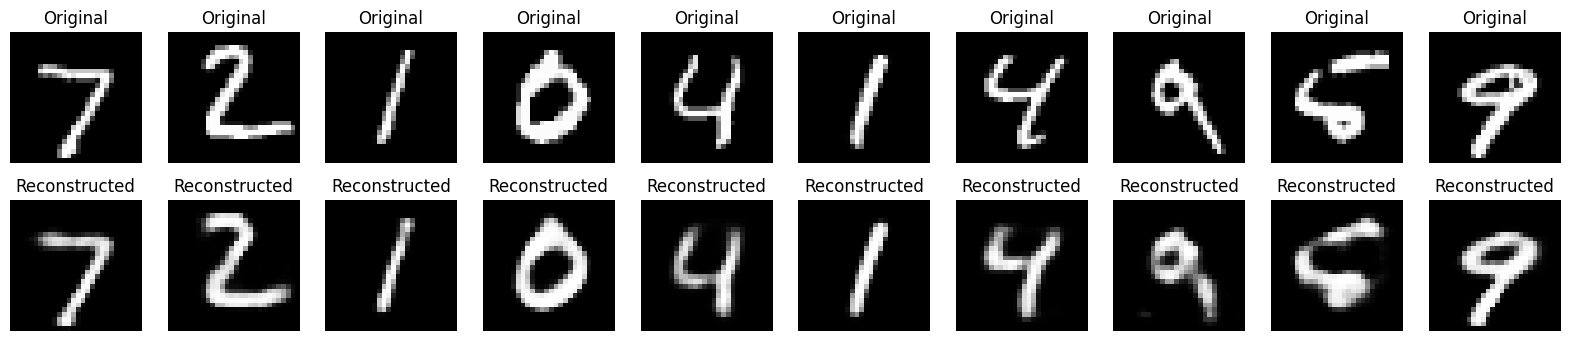

In [ ]:
#comparison
n = 10  # number of digits to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_img[i], cmap='gray')
    plt.title("Original")
    plt.axis("off")
    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i], cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()


In [ ]:
test_loss = autoencoder.evaluate(x_test, x_test)
print("Test Loss:", test_loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0913
Test Loss: 0.0911339744925499


Autoencoders are very useful for image reconstruction ,video generation etc.the applications are applying in both in latest models like ltx2,wan etc.First tring to reduce the image into latent space .from this compressed re[eresction its trying to reconstruct from latent to final sized image
Validation and training loss are almost similar.and ots loss is very negligible too menas image reconstruted fairly well